In [ ]:
!pip install Tokenterminal
from tokenterminal import TokenTerminal
token_terminal = TokenTerminal(key='6c37f0ff-5c2b-4564-8286-3bccf6e42fd2')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
!cp /content/drive/MyDrive/Colab\ Notebooks/TokenTerminal_Functions.py /content

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import TokenTerminal_Functions as tt

In [5]:
# Fetch project's historical metrics

cap = token_terminal.get_historical_metrics('cap')

In [6]:
# metrics from TokenTerminal

PRICE = tt.get_price(cap)
MCAP = tt.get_mcap(cap)
MARKET_CAP_CIRCULATING = tt.get_mcap_circ(cap)
MARKET_CAP_FULLY_DILUTED = tt.get_mcap_fully_diluted(cap)
VOLUME = tt.get_volume(cap)
VOL_MC = tt.get_vol_mc(cap)
PE_CIRCULATING = tt.get_pe_circ(cap)
PE = tt.get_pe(cap)
PS_CIRCULATING = tt.get_ps_circ(cap)
PS = tt.get_ps(cap)
TVL = tt.get_tvl(cap)
GMV = tt.get_gmv(cap)
REVENUE = tt.get_revenue(cap)
REVENUE_SUPPLY_SIDE = tt.get_revenue_ss(cap)
REVENUE_PROTOCOL = tt.get_revenue_p(cap)

In [7]:
# Calculate daily return of Cap

PRICE['RETURN'] = (PRICE['PRICE']/PRICE['PRICE'].shift(1)) - 1

In [8]:
PRICE['PCT_CHANGE'] = PRICE['PRICE'].pct_change(1)

In [9]:
# Calculate daily average return base on last 30 days

Daily_avg_return = np.average(PRICE['2022-09-02':'2022-10-02']['PCT_CHANGE'])

In [10]:
Daily_avg_return*100

1.4749809960674327

In [11]:
PRICE['PCT_CHANGE_7DAYS'] = PRICE['PRICE'].pct_change(7)

In [12]:
# Calculate weekly average return base on last 365 days

Weekly_avg_return = np.average(PRICE['2021-10-02':'2022-10-02']['PCT_CHANGE_7DAYS'])

In [13]:
Weekly_avg_return*100

4.8072089205908e+36

In [14]:
PRICE['PCT_CHANGE_30DAYS'] = PRICE['PRICE'].pct_change(30)

In [15]:
PRICE['PCT_CHANGE_90DAYS'] = PRICE['PRICE'].pct_change(90)

In [16]:
PRICE['PCT_CHANGE_365DAYS'] = PRICE['PRICE'].pct_change(365)

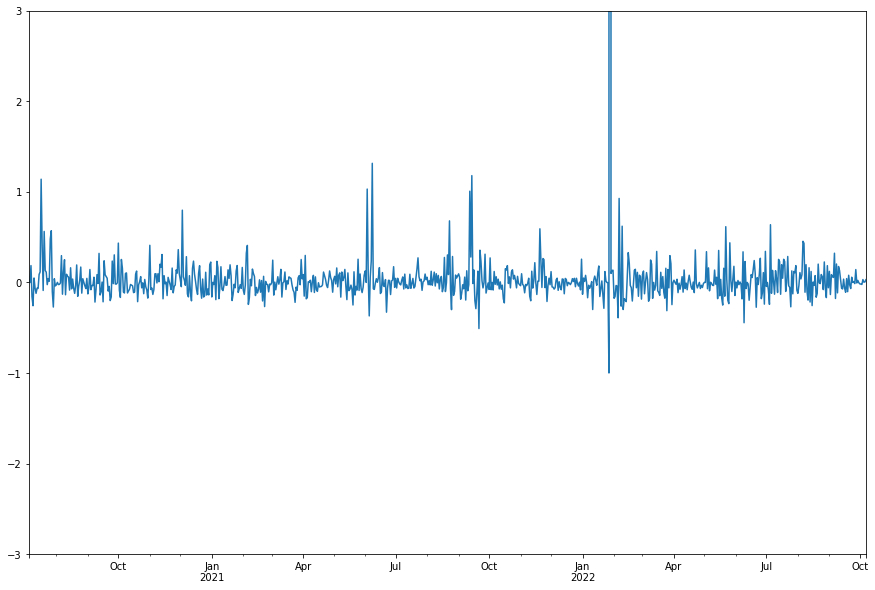

In [17]:
# Ploting daily return Cap

PRICE['RETURN'].plot(figsize=(15,10),ylim=(-3,3))

In [18]:
# Annual return based on daily return

Ann_return_d = pow((1+PRICE.iloc[-1,2]),365)-1
print('Annualized return based on day return:',Ann_return_d)

Ann_return_w = pow((1+PRICE.iloc[-1,3]),52)-1
print('Annualized return based on week return:',Ann_return_w)

Ann_return_m = pow((1+PRICE.iloc[-1,4]),12)-1
print('Annualized return based on month return:',Ann_return_m)

Ann_return_q = pow((1+PRICE.iloc[-1,5]),12)-1
print('Annualized return based on quartal return:',Ann_return_q)

Annualized return based on day return: 43121.10208993056
Annualized return based on week return: 0.6113907988394018
Annualized return based on month return: 10.223547995130657
Annualized return based on quartal return: 1224134316.0817828


In [19]:
print(PRICE.iloc[-1,3])

0.009217173847995142


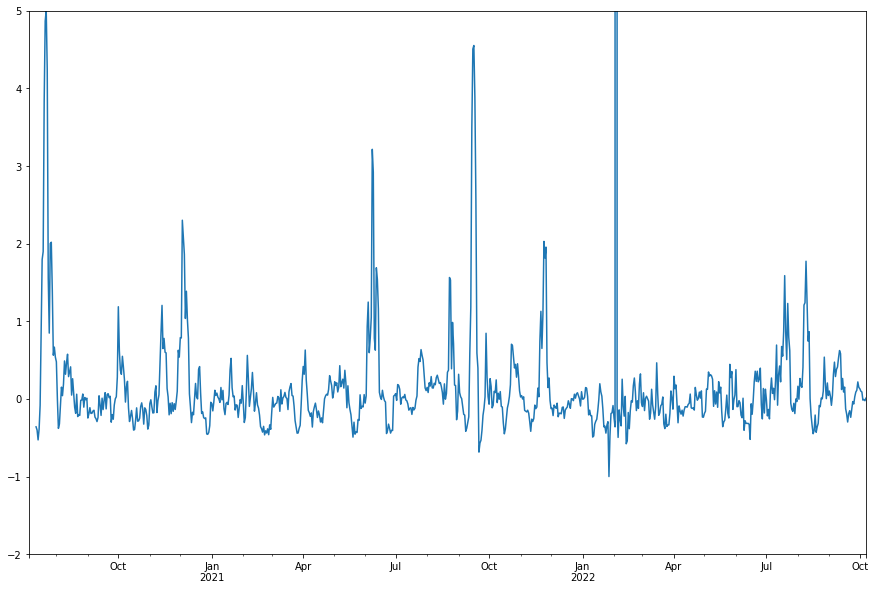

In [20]:
# Ploting weekly return Cap

PRICE['PCT_CHANGE_7DAYS'].plot(figsize=(15,10),ylim = (-2,5))

In [22]:
# Calculate daily average volume base on last 30 days

Daily_avg_volume = np.average(VOLUME['2022-09-02':'2022-10-02'])

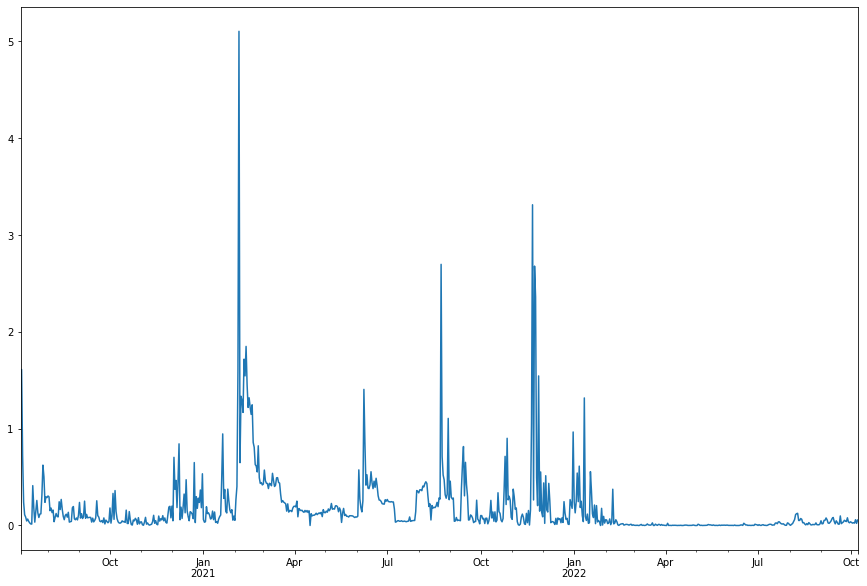

In [26]:
# Ploting daily volume in Cap

(VOLUME['VOLUME']/1e6).plot(figsize=(15,10))

In [27]:
Daily_avg_volume

41757.94559702099

In [28]:
Annualized_volume = Daily_avg_volume*365

In [29]:
Annualized_volume

15241650.142912662

In [30]:
# Import data (fees) last 30 days

fee_Cap = pd.read_csv('/content/Daily Fees In The Past 30 Days. 2022-10-07  Cap.csv')

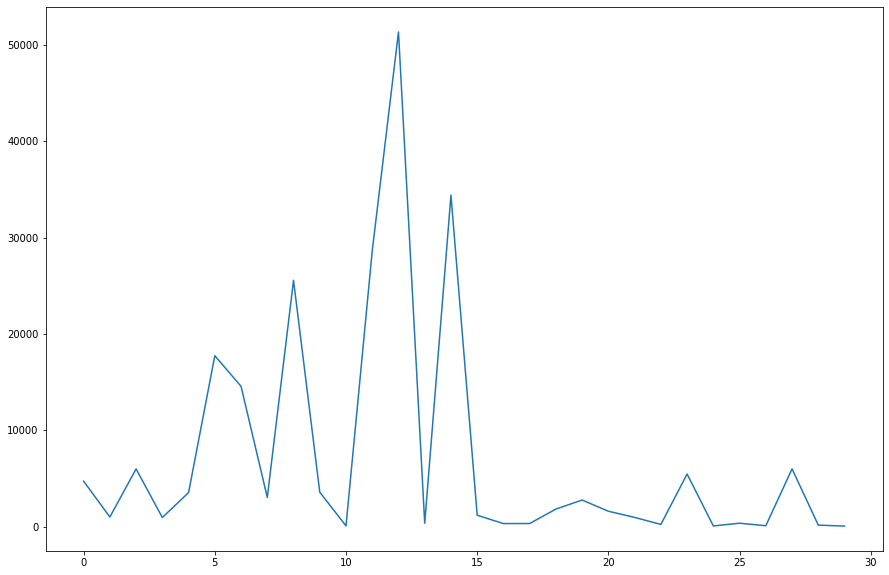

In [31]:
# Ploting daily fee last 30 days - Cap

fee_Cap['Fees ($)'].plot(figsize=(15,10))

In [32]:
# Daily average fees based on last 30 days

Daily_avg_fee = np.average(fee_Cap['Fees ($)'])

In [33]:
Daily_avg_fee

7221.684333333333

In [34]:
# Annualized fee

Annualized_fee = Daily_avg_fee*365

In [35]:
Annualized_fee

2635914.7816666663

**FEE = REVENUE*2 FOR Cap**

In [37]:
Daily_avg_revenue = Daily_avg_fee/2
Annualized_revenue = Annualized_fee/2
print('Daily average revenue is:',Daily_avg_revenue)
print('Annualized revenue is:',Annualized_revenue)

Daily average revenue is: 3610.8421666666663
Annualized revenue is: 1317957.3908333331


In [38]:
# TVL in millions

TVL_Cap = TVL/1e6

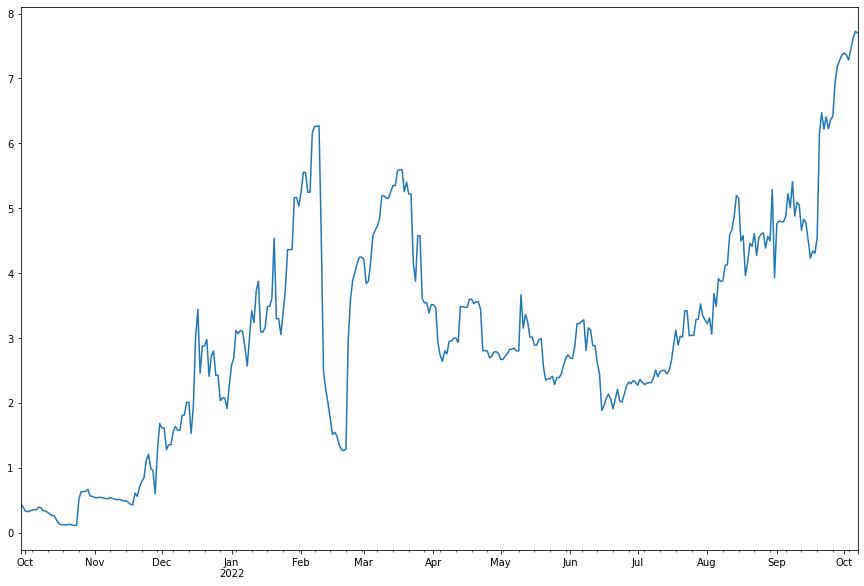

In [40]:
# Ploting daily TVL in millions - Cap

TVL_Cap['tvl'].plot(figsize=(15,10))

In [41]:
first = TVL.iloc[-1,0]
second = TVL.iloc[344,0]
# Turnover TVL last 30 days

TVL_30days_turnover = first/second

In [42]:
TVL_30days_turnover

1.4234771115955855

In [43]:
# Annulized volatility

Price_ = PRICE['2022-01-01':'2022-10-05']['PRICE']
Price_chg = (np.log(Price_) - np.log(Price_.shift(1)))[1:]
vol_Cap = np.std(Price_chg)
ann_vol_Cap = vol_Cap*np.sqrt(365)

In [44]:
ann_vol_Cap

139.69146803654357

In [46]:
# Fully diluted Market Cap

FD_MC_Cap = MARKET_CAP_FULLY_DILUTED.iloc[-1,0]
print('FD_MC_Cap=',FD_MC_Cap)

# Circulated Market Cap

C_MC_Cap = MARKET_CAP_CIRCULATING.iloc[-1,0]
print('C_MC_Cap=',C_MC_Cap)

# Ratio MarketCap/Annulized fee

MC_AF = C_MC_Cap/Annualized_fee
print('MC_AF=',MC_AF)

# Ratio MarketCap/Annulized revenue

MC_AR = C_MC_Cap/Annualized_revenue
print('MC_AR=',MC_AR)

# Ratio Fully Diluted Market Cap/Annulized fee

FD_AF = FD_MC_Cap/Annualized_fee
print('FD_AF=',FD_AF)

# Ratio Fully Diluted Market Cap/Annulized revenue

FD_AR = FD_MC_Cap/Annualized_revenue
print('FD_AR=',FD_AR)

# Ratio MarketCap/TVL

MC_TVL =C_MC_Cap/TVL.iloc[-1,0]
print('MC_TVL=',MC_TVL)

# Ratio  Fully Diluted MarketCap/TVL

MC_FD_TVL =FD_MC_Cap/TVL.iloc[-1,0]
print('MC_FD_TVL=',MC_FD_TVL)

# % circullated supply

CS = C_MC_Cap/FD_MC_Cap
print('circullated supply=',CS)

FD_MC_Cap= 20022510.981680952
C_MC_Cap= 16707834.56092964
MC_AF= 6.338533657133414
MC_AR= 12.677067314266829
FD_AF= 7.596038810109365
FD_AR= 15.19207762021873
MC_TVL= 2.170131289097542
MC_FD_TVL= 2.600664820398323
circullated supply= 0.8344525107872841
